# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
X = df.drop('Class', axis=1)
y = df['Class']
X.shape

(284807, 30)

In [5]:
# датасет ОЧЕНЬ не сбалансированный
y[y == 1].shape

(492,)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, roc_auc_score, make_scorer

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
log_reg = LogisticRegression().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
tree = DecisionTreeClassifier().fit(X_train, y_train)
dummy = DummyClassifier().fit(X_train, y_train)

In [ ]:
log_reg_pred = log_reg.predict(X_test)
knn_pred = knn.predict(X_test)
tree_pred = tree.predict(X_test)
dummy_pred = dummy.predict(X_test)

In [ ]:
# accuracy
print(f'Linear Regression accuracy: {accuracy_score(y_test, log_reg_pred)}')
print(f'KNN accuracy: {accuracy_score(y_test, knn_pred)}')
print(f'Tree accuracy: {accuracy_score(y_test, tree_pred)}')
print(f'Dummy accuracy: {accuracy_score(y_test, dummy_pred)}')

Linear Regression accuracy: 0.9988647402361809
KNN accuracy: 0.9982093325374811
Tree accuracy: 0.9991456292499094
Dummy accuracy: 0.9980922954484276


In [ ]:
# precision
print(f'Linear Regression precision: {precision_score(y_test, log_reg_pred)}')
print(f'KNN precision: {precision_score(y_test, knn_pred)}')
print(f'Tree precision: {precision_score(y_test, tree_pred)}')
print(f'Dummy precision: {precision_score(y_test, dummy_pred)}')

Linear Regression precision: 0.7088607594936709
KNN precision: 1.0
Tree precision: 0.7616279069767442
Dummy precision: 0.0


In [ ]:
# recall
print(f'Linear Regression recall: {recall_score(y_test, log_reg_pred)}')
print(f'KNN recall: {recall_score(y_test, knn_pred)}')
print(f'Tree recall: {recall_score(y_test, tree_pred)}')
print(f'Dummy recall: {recall_score(y_test, dummy_pred)}')

Linear Regression recall: 0.6871165644171779
KNN recall: 0.06134969325153374
Tree recall: 0.803680981595092
Dummy recall: 0.0


In [ ]:
# f1 score
print(f'Linear Regression f1: {f1_score(y_test, log_reg_pred)}')
print(f'KNN f1: {f1_score(y_test, knn_pred)}')
print(f'Tree f1: {f1_score(y_test, tree_pred)}')
print(f'Dummy f1: {f1_score(y_test, dummy_pred)}')

Linear Regression f1: 0.6978193146417445
KNN f1: 0.11560693641618495
Tree f1: 0.7820895522388059
Dummy f1: 0.0


In [ ]:
# roc-auc
print(f'Linear Regression roc-auc: {roc_auc_score(y_test, log_reg_pred)}')
print(f'KNN roc-auc: {roc_auc_score(y_test, knn_pred)}')
print(f'Tree roc-auc: {roc_auc_score(y_test, tree_pred)}')
print(f'Dummy froc-auc: {roc_auc_score(y_test, dummy_pred)}')

Linear Regression roc-auc: 0.8432885823962063
KNN roc-auc: 0.5306748466257669
Tree roc-auc: 0.9016001061821615
Dummy froc-auc: 0.5


In [ ]:
from sklearn.metrics import roc_curve

Text(0.5, 1.0, 'Dummy')

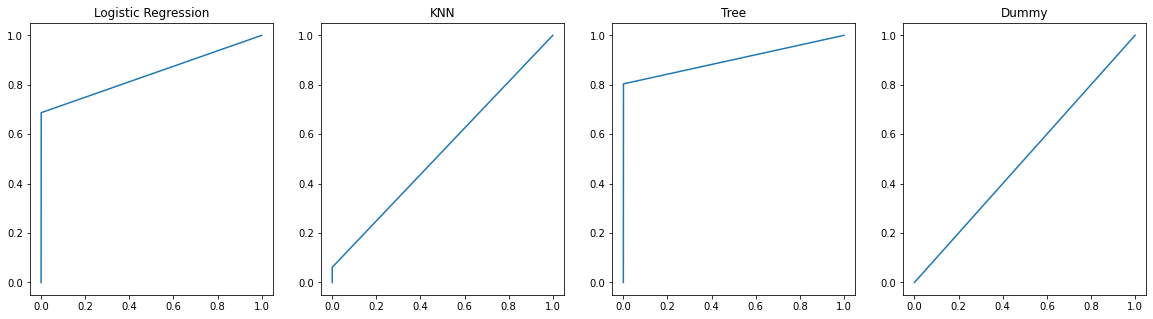

In [ ]:
# roc-curve
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_pred)
axs[0].plot(fpr_log, tpr_log)
axs[0].set_title('Logistic Regression')


fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_pred)
axs[1].plot(fpr_knn, tpr_knn)
axs[1].set_title('KNN')


fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_pred)
axs[2].plot(fpr_tree, tpr_tree)
axs[2].set_title('Tree')

fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_pred)
axs[3].plot(fpr_dummy, tpr_dummy)
axs[3].set_title('Dummy')

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Главной метрикой, которую я буду максимизировать будет precision. Данные несбалансированы и нам важнее банить настоящих мошенников, иначе клиенты будут уходить от нас после случайной блокировки

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

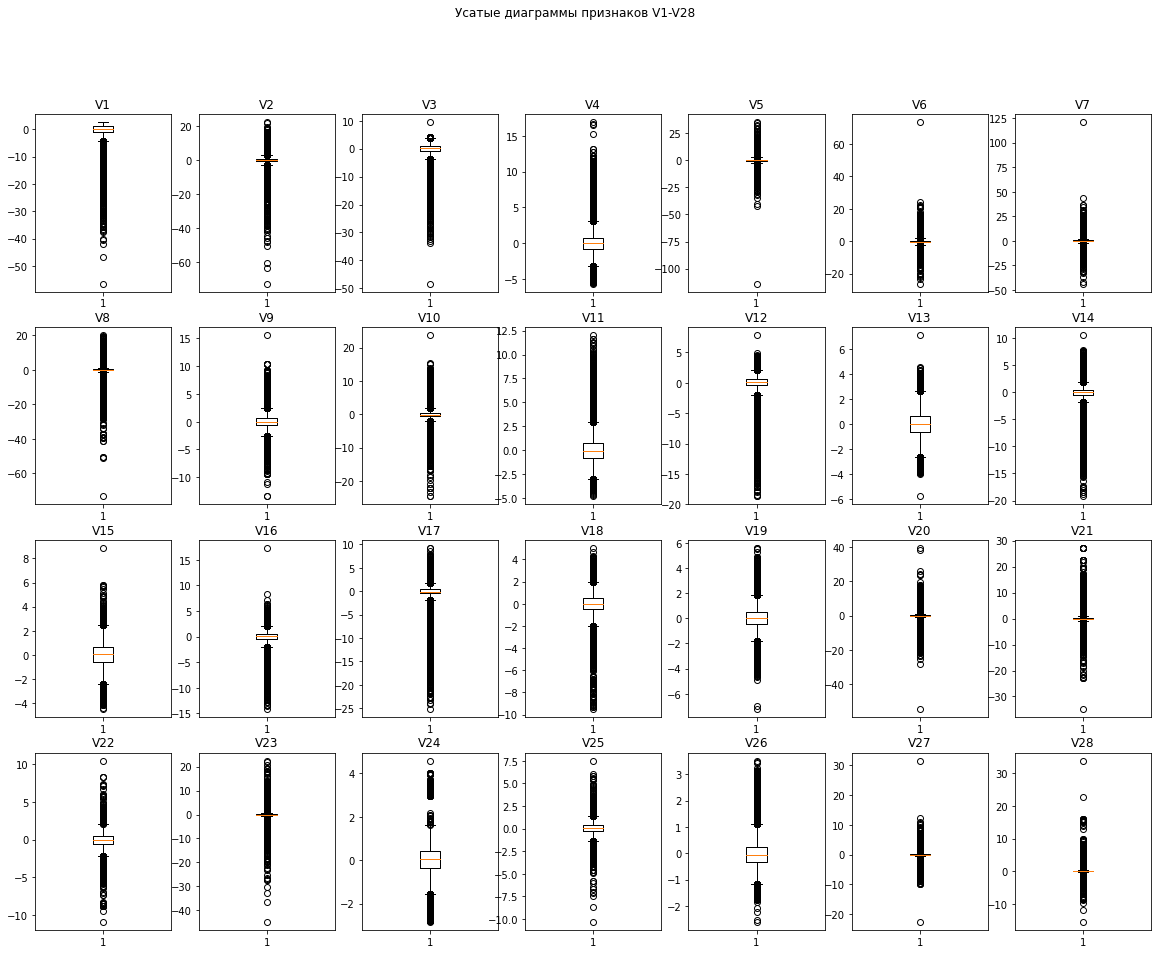

In [ ]:
fig, axs = plt.subplots(4, 7, figsize=(20, 15))

fig.suptitle('Усатые диаграммы признаков V1-V28')
for i in range(1, 5):
  for j in range(1, 8):
    num = (i - 1) * 7 + j
    axs[i - 1, j - 1].boxplot(df[f'V{str(num)}'])
    axs[i - 1, j - 1].set_title(f'V{str(num)}')

fig.show()

Какие выводы можно сделать из этих графиков? Ну только такой: в признаках огромное количество выбросов. Поэтому стоит попробовать регуляризации во избежание переобучения

In [ ]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
print(f'Медиана стоимости покупки: {np.median(df["Amount"])}')

Медиана стоимости покупки: 22.0


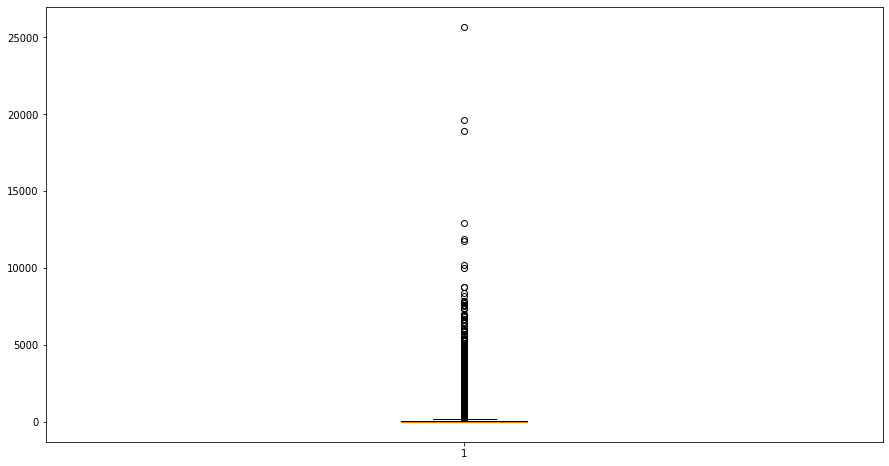

In [ ]:
plt.figure(figsize=(15, 8))
plt.boxplot(df['Amount'])
plt.show()

In [ ]:
# попробуем почистить данные, удалив выбросы с помощью 1.5 IQR method
df_cleared = df.copy()
print(df_cleared.shape)

for elem in df_cleared.columns:
  if df_cleared.shape[0] == 0:
    break
  if elem == 'Time' or elem == 'Amount' or elem == 'Class':
    continue
  q25, q75 = np.quantile(df_cleared[elem], (0.25, 0.75))
  IQR = q75 - q25

  df_cleared = df_cleared[df_cleared[elem] > 1.5 * IQR]
  df_cleared = df_cleared[df_cleared[elem] < 1.5 * IQR]

# ой, ничего не получилось((9(
print(df_cleared.shape)

(284807, 31)
(0, 31)


Лучший precision при коэф. 1.300


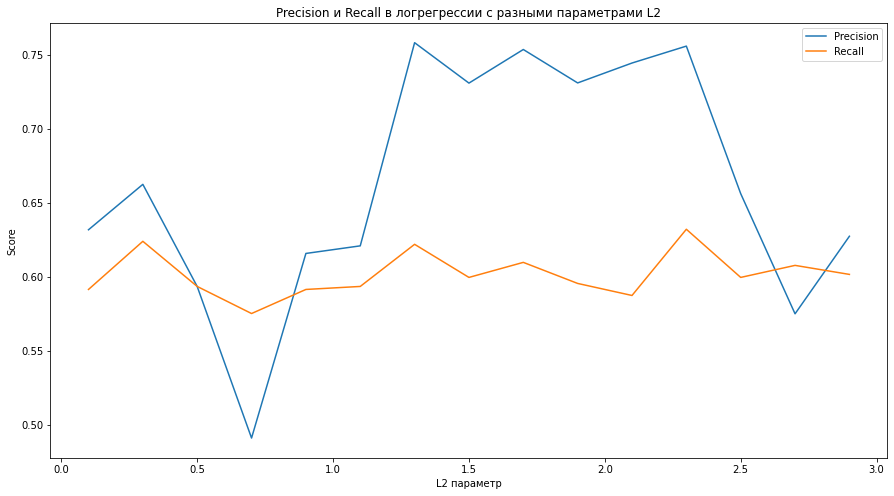

In [ ]:
# ладно, попробуем подобрать гиперпараметры у разных моделей
coefs = np.arange(0.1, 3, 0.2)
precision_log = []
recall_log = []

precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

for coef in coefs:
  model = LogisticRegression(penalty='l2', C=coef)
  precision_log.append((coef, cross_val_score(model, X, y, cv=4, scoring=precision_scorer).mean()))
  recall_log.append((coef, cross_val_score(model, X, y, cv=4, scoring=recall_scorer).mean()))

precision_log = np.array(precision_log)
recall_log = np.array(recall_log)

ind = precision_log[:, 1].argmax()
print(f'Лучший precision при коэф. {precision_log[ind, 0]:.3f}')

plt.figure(figsize=(15, 8))
plt.plot(coefs, precision_log[:, 1])
plt.plot(coefs, recall_log[:, 1])
plt.title('Precision и Recall в логрегрессии с разными параметрами L2')
plt.ylabel('Score')
plt.xlabel('L2 параметр')
plt.legend(['Precision', 'Recall'])
plt.show()

Лучший precision при коэф. 2.000: 100.0%


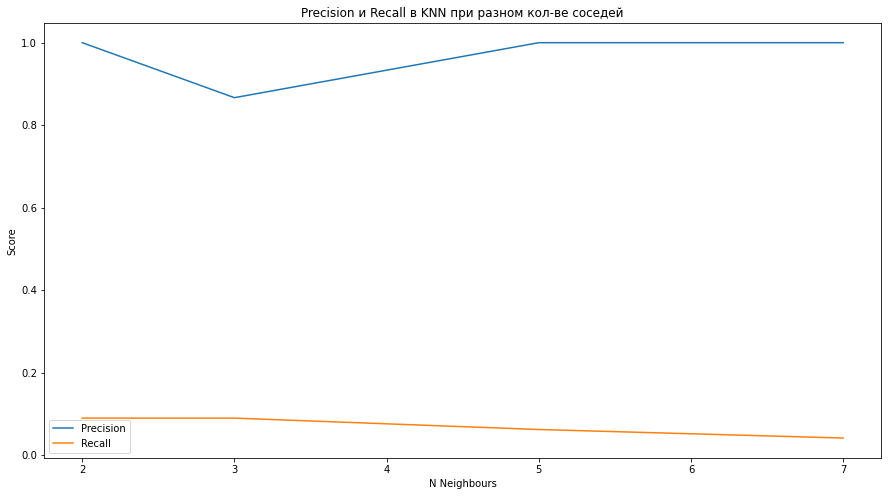

In [27]:
n_neighbours = [2, 3, 5, 7]
precision_knn = []
recall_knn = []

for amount in n_neighbours:
  model = KNeighborsClassifier(n_neighbors=amount).fit(X_train, y_train)
  pred = model.predict(X_test)
  precision_knn.append((amount, precision_score(y_test, pred)))
  recall_knn.append((amount, recall_score(y_test, pred)))

precision_knn = np.array(precision_knn)
recall_knn = np.array(recall_knn)

ind = precision_knn[:, 1].argmax()
print(f'Лучший precision при коэф. {precision_knn[ind, 0]:.3f}: {100 * precision_knn[ind, 1]:.1f}%')

plt.figure(figsize=(15, 8))
plt.plot(n_neighbours, precision_knn[:, 1])
plt.plot(n_neighbours, recall_knn[:, 1])
plt.title('Precision и Recall в KNN при разном кол-ве соседей')
plt.ylabel('Score')
plt.xlabel('N Neighbours')
plt.legend(['Precision', 'Recall'])
plt.show()

Лучший precision при коэф. 3.000: 85.0%


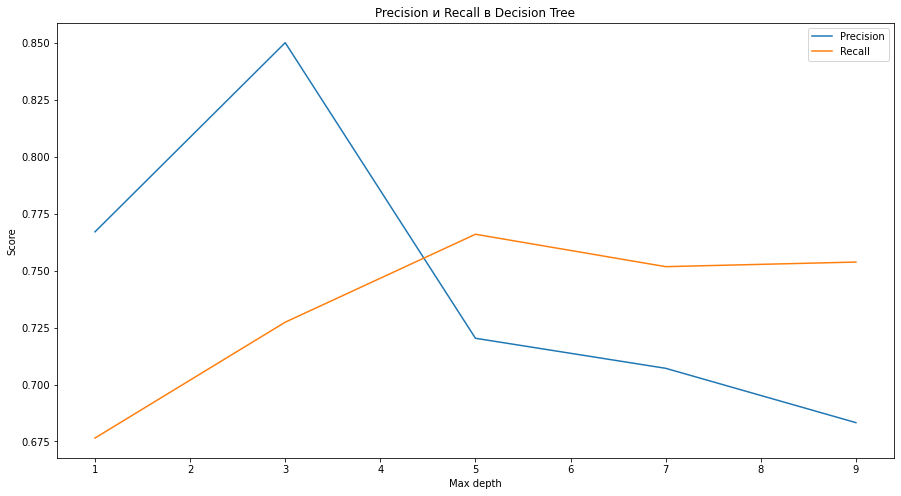

In [28]:
coefs = np.arange(1, 10, 2)
precision_tree_depth = []
recall_tree_depth = []

precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

for coef in coefs:
  model = DecisionTreeClassifier(max_depth=coef)
  precision_tree_depth.append((coef, cross_val_score(model, X, y, scoring=precision_scorer).mean()))
  recall_tree_depth.append((coef, cross_val_score(model, X, y, scoring=recall_scorer).mean()))

precision_tree_depth = np.array(precision_tree_depth)
recall_tree_depth = np.array(recall_tree_depth)

ind = precision_tree_depth[:, 1].argmax()
print(f'Лучший precision при коэф. {precision_tree_depth[ind, 0]:.3f}: {100 * precision_tree_depth[ind, 1]:.1f}%')

plt.figure(figsize=(15, 8))
plt.plot(coefs, precision_tree_depth[:, 1])
plt.plot(coefs, recall_tree_depth[:, 1])
plt.title('Precision и Recall в Decision Tree')
plt.ylabel('Score')
plt.xlabel('Max depth')
plt.legend(['Precision', 'Recall'])
plt.show()

Лучший precision при коэф. 16.000: 86.6%


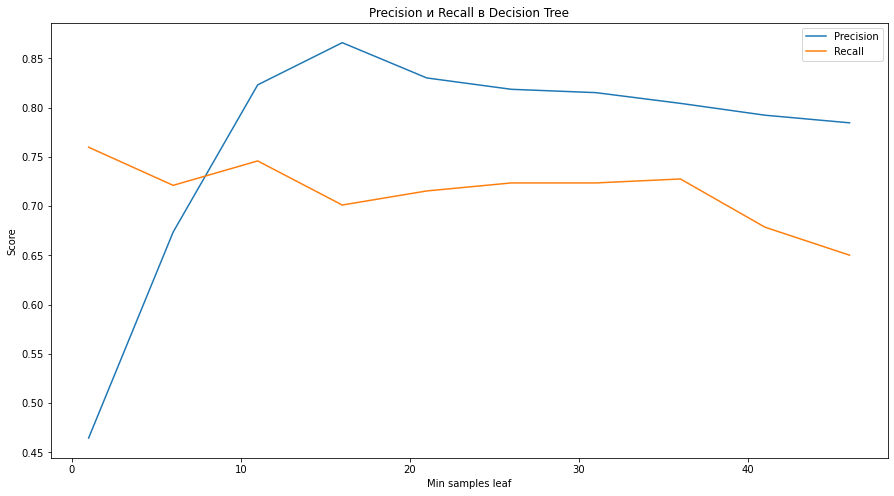

In [29]:
from sklearn.metrics import make_scorer

coefs = np.arange(1, 50, 5)
precision_tree = []
recall_tree = []

precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

for coef in coefs:
  model = DecisionTreeClassifier(min_samples_leaf=coef)
  precision_tree.append((coef, cross_val_score(model, X, y, scoring=precision_scorer).mean()))
  recall_tree.append((coef, cross_val_score(model, X, y, scoring=recall_scorer).mean()))

precision_tree = np.array(precision_tree)
recall_tree = np.array(recall_tree)

ind = precision_tree[:, 1].argmax()
print(f'Лучший precision при коэф. {precision_tree[ind, 0]:.3f}: {100 * precision_tree[ind, 1]:.1f}%')

plt.figure(figsize=(15, 8))
plt.plot(coefs, precision_tree[:, 1])
plt.plot(coefs, recall_tree[:, 1])
plt.title('Precision и Recall в Decision Tree')
plt.ylabel('Score')
plt.xlabel('Min samples leaf')
plt.legend(['Precision', 'Recall'])
plt.show()

KNN и дерево показали хорошие результаты, KNN даже достигло Precision 1, но из-за времени обучения/предсказания и лучшего recall, я бы выбрал дерево

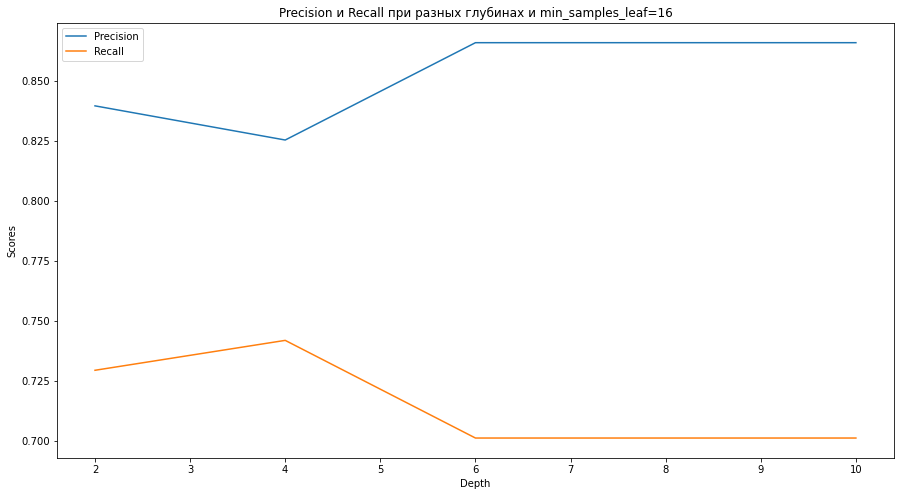

In [49]:
precision_results = []
recall_results = []

for depth in range(2, 11, 2):
    precision_results.append(cross_val_score(DecisionTreeClassifier(max_depth=depth, min_samples_leaf=16), X, y,
                                             scoring=make_scorer(precision_score)).mean())
    recall_results.append(cross_val_score(DecisionTreeClassifier(max_depth=depth, min_samples_leaf=16), X, y,
                                             scoring=make_scorer(recall_score)).mean())


precision_results = np.array(precision_results)
recall_results = np.array(recall_results)

plt.figure(figsize=(15, 8))
plt.plot(range(2, 11, 2), precision_results)
plt.plot(range(2, 11, 2), recall_results)
plt.title('Precision и Recall при разных глубинах и min_samples_leaf=16')
plt.ylabel('Scores')
plt.xlabel('Depth')
plt.legend(['Precision', 'Recall'])
plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
best_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=16).fit(X_train, y_train)
predictions = best_model.predict(X_test)
precision = precision_score(y_test, predictions)
banned = predictions[predictions == 1].shape[0]

print('---Результаты---')
print(f'Precision: {100 * precision:.1f}')
print(f'Общее кол-во "забаненных" человек: {banned}')
print(f'Из них невиновных: {int(banned * (1 - precision))}')

---Результаты---
Precision: 88.5
Общее кол-во "забаненных" человек: 122
Из них невиновных: 14


В целом результат не плохой, KNN мог в теории избавать нас от невинных жертв, но скорость работы и очень низкий процент банов ставит под вопрос целесообразность его использования(наверное тогда лучше совсем без модели)

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?